# Assignment 3

## Sourcing data from URL.

Author: Kyra Menai Hamilton

Brief: 

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

Just creating the pie chart
Making it look nice
As always your code should be well laid out.

In [40]:
# Import the modules needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


1. Source the data

In [41]:
# First need to save the data from the url.

df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")
print(df.head(5)) # to check it worked.

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


2. Make a pie chart

In [42]:
# The data needs to be cleaned to remove any rows with missing data.
df = df.dropna()
print(df.head(5)) # to check it worked.

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


In [43]:
# Now to make a pie chart we need to group the data by Job Title and count the number of User Id in each Job Title role.
grouped = df.groupby('Job Title').count()['User Id']
print(grouped)

Job Title
Academic librarian                      5
Accommodation manager                   2
Accountant, chartered                   1
Accountant, chartered certified         3
Accountant, chartered public finance    3
                                       ..
Water quality scientist                 2
Web designer                            3
Wellsite geologist                      1
Writer                                  3
Youth worker                            2
Name: User Id, Length: 519, dtype: int64


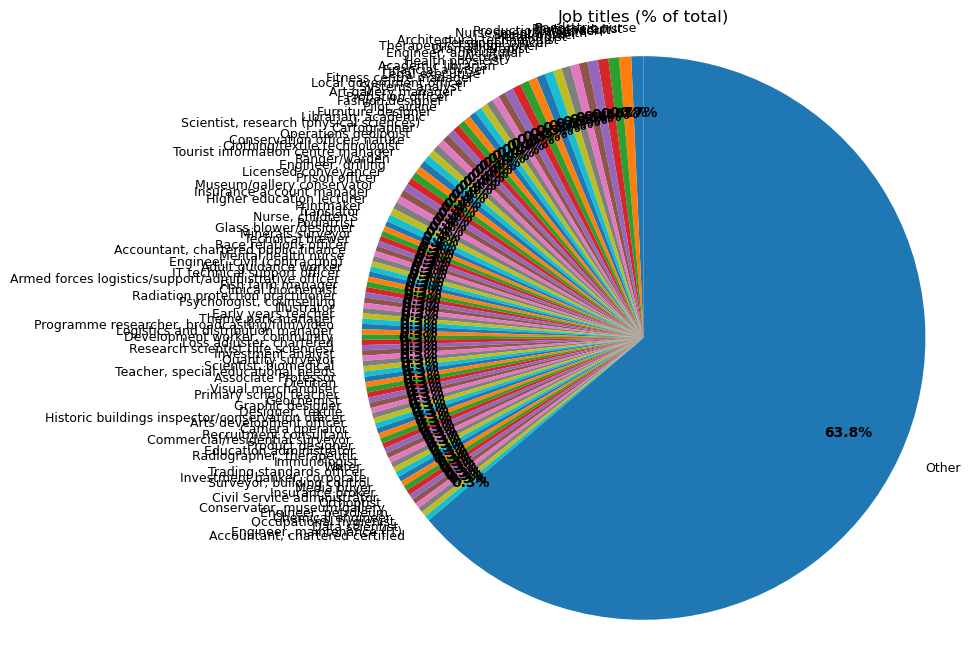

In [51]:
# Need to Enable inline plotting for this Jupyter Notebook.
# %matplotlib inline
# Create a pie chart showing percentage of total for each Job Title.
# We'll group less common job titles into 'Other' if there are many categories to keep the chart readable.
counts = df['Job Title'].value_counts()
# Decide how many slices to show (top_n). Remaining will be grouped into 'Other'
top_n = 100
if len(counts) > top_n:
    top = counts.iloc[:top_n]
    other = counts.iloc[top_n:].sum()
    labels = list(top.index) + ['Other']
    sizes = list(top.values) + [other]
else:
    labels = list(counts.index)
    sizes = list(counts.values)

# Convert sizes to percentages of the total
total = sum(sizes)
percent_sizes = [s / total * 100 for s in sizes]

fig, ax = plt.subplots(figsize=(8, 8))
# Explode the largest slice slightly for emphasis
# explode = [0.05 if i == 0 else 0 for i in range(len(sizes))]
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Job titles (% of total)')
# Improve text size
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=9)

plt.show()


Sex
Male      506
Female    494
Name: count, dtype: int64


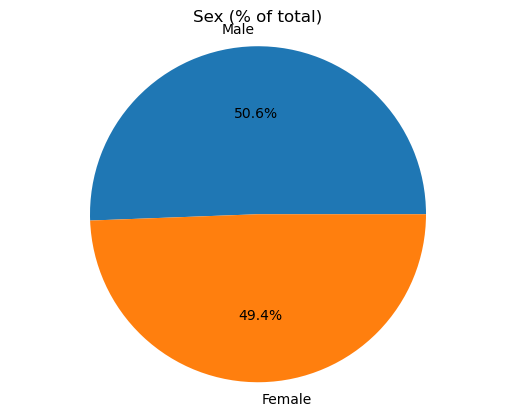

In [52]:
# Plot the data on a pie chart to visualise the percentage of each sex in the dataset.
countsmf = df['Sex'].value_counts()
print(countsmf) # to check it worked.

# Create a pie chart showing percentage of total for each sex.
labels = 'Male', 'Female'
sizes = [506, 494]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Sex (% of total)')
plt.show()

In [53]:
# Now to divide the whole dataset into 2. one male and one female.
# then one pie chart for each showing the percentage job title role for each sex.

df_male = df[df['Sex'] == 'Male']
df_female = df[df['Sex'] == 'Female']
print(df_male.head(5)) # to check it worked.
print(df_female.head(5)) # to check it worked.
# Now to make a pie chart we need to group the data by Job Title and count the number of User Id in each Job Title role.
grouped_male = df_male.groupby('Job Title').count()['User Id']
grouped_female = df_female.groupby('Job Title').count()['User Id']
print(grouped_male)
print(grouped_female)

   Index          User Id First Name Last Name   Sex                   Email  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney  Male     pwarner@example.org   
3      4  BF2a889C00f0cE1    Whitney    Hooper  Male   zjohnston@example.com   
5      6  aF75e6dDEBC5b66     Sherry  Caldwell  Male   kaitlin13@example.net   
6      7  efeb05c7Cc94EA3     Ernest   Hoffman  Male  jeffharvey@example.com   
7      8  fb1BF3FED57E9d7      Doris  Andersen  Male    alicia33@example.org   

               Phone Date of birth                  Job Title  
0       857.139.8239    2014-01-27          Probation officer  
3    +1-939-130-6258    2012-11-17   Counselling psychologist  
5         8537800927    1917-08-06  Higher education lecturer  
6  093.655.7480x7895    1984-12-22             Health visitor  
7         4709522945    2016-12-02                 Air broker  
    Index          User Id First Name Last Name     Sex  \
1       2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2       3  810Ce0

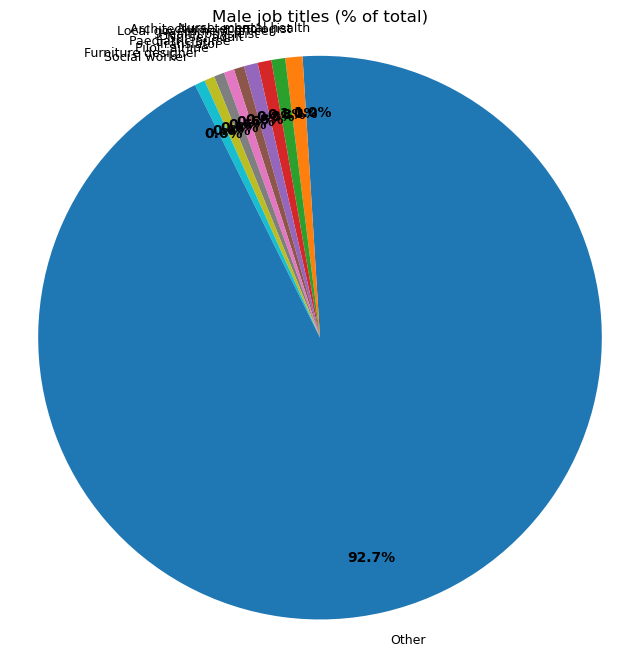

In [61]:
# Need to Enable inline plotting for this Jupyter Notebook.
# %matplotlib inline
# Create a pie chart showing percentage of total for each Job Title for males.
counts_male = df_male['Job Title'].value_counts()
# Decide how many slices to show (top_n). Remaining will be grouped into 'Other'
top_n = 10
if len(counts_male) > top_n:
    top_male = counts_male.iloc[:top_n]
    other_male = counts_male.iloc[top_n:].sum()
    labels_male = list(top_male.index) + ['Other']
    sizes_male = list(top_male.values) + [other_male]
else:
    labels_male = list(counts_male.index)
    sizes_male = list(counts_male.values)   
# Convert sizes to percentages of the total
total_male = sum(sizes_male)
percent_sizes_male = [s / total_male * 100 for s in sizes_male]
fig, ax = plt.subplots(figsize=(8, 8))
# Explode the largest slice slightly for emphasis
# explode = [0.05 if i == 0 else 0 for i in range(len(sizes))]
wedges, texts, autotexts = ax.pie(sizes_male, labels=labels_male, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Male job titles (% of total)')
# Improve text size
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=9)
plt.show()


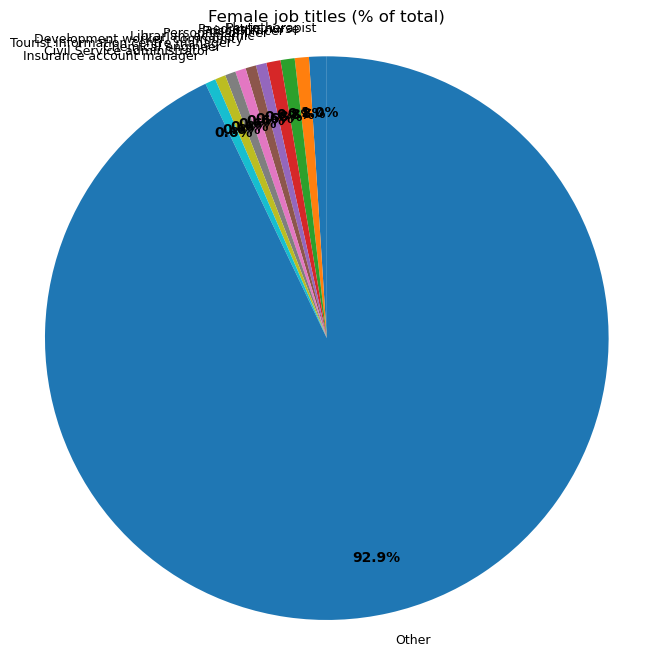

In [62]:
# Create a pie chart showing percentage of total for each Job Title for females.
counts_female = df_female['Job Title'].value_counts()
# Decide how many slices to show (top_n). Remaining will be grouped into 'Other'    
top_n = 10
if len(counts_female) > top_n:
    top_female = counts_female.iloc[:top_n]
    other_female = counts_female.iloc[top_n:].sum()
    labels_female = list(top_female.index) + ['Other']
    sizes_female = list(top_female.values) + [other_female]
else:
    labels_female = list(counts_female.index)
    sizes_female = list(counts_female.values)
# Convert sizes to percentages of the total
total_female = sum(sizes_female)
percent_sizes_female = [s / total_female * 100 for s in sizes_female]
fig, ax = plt.subplots(figsize=(8, 8))  
# Explode the largest slice slightly for emphasis
# explode = [0.05 if i == 0 else 0 for i in range(len(sizes))]
wedges, texts, autotexts = ax.pie(sizes_female, labels=labels_female, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Female job titles (% of total)')
# Improve text size 
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=9)
plt.show()

To make the data easier to explore, I decided to plot a pie plot for each of the 12 top job titles and display the percentage of male/female in those job roles.


Top roles (by total people):
Job Title
Phytotherapist                7
Paediatric nurse              7
Nurse, adult                  6
Production engineer           6
Nurse, mental health          6
Dramatherapist                5
Social worker                 5
Architectural technologist    5
Therapeutic radiographer      5
Personnel officer             5
Metallurgist                  5
Academic librarian            5
Name: total, dtype: int64


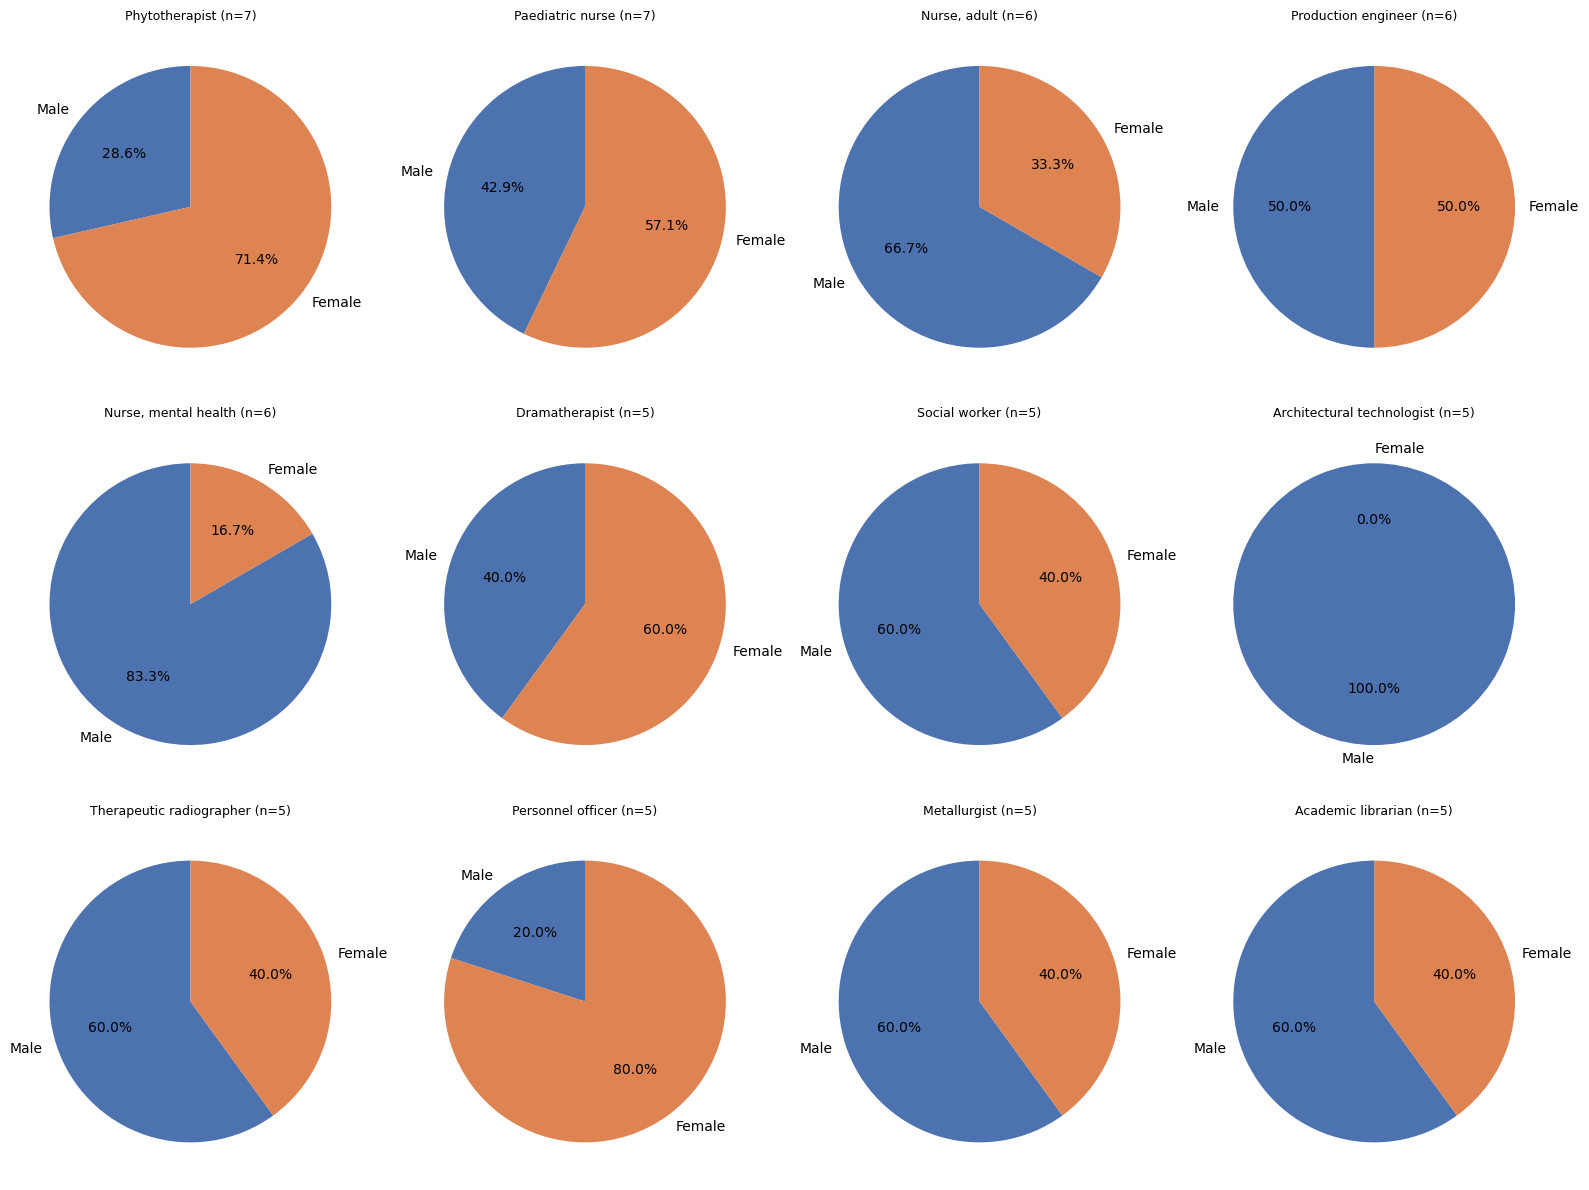

In [ ]:
# Create multiple pie charts (one per job title) showing male/female percentage for top roles
ct = pd.crosstab(df['Job Title'], df['Sex'])
for col in ['Male', 'Female']:
    if col not in ct.columns:
        ct[col] = 0
ct['total'] = ct.sum(axis=1)

# Select top roles by total count
top_n = 12
top_roles = ct.sort_values('total', ascending=False).head(top_n)
print('Top roles (by total people):')
print(top_roles['total'])

# Plot a grid of pie charts. used the histograms example from my pands project to aid in doing this: Plot- https://github.com/KaiiMenai/pands-project/blob/main/analysis.py Code- https://github.com/KaiiMenai/pands-project/blob/main/histograms_by_species.png
n = len(top_roles)
cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = axes.flatten()
for i, (role, row) in enumerate(top_roles.iterrows()):
    male = row.get('Male', 0)
    female = row.get('Female', 0)
    sizes = [male, female]
    labels = ['Male', 'Female']
    # Avoid plotting empty pies
    if male + female == 0:
        axes[i].text(0.5, 0.5, 'No data', ha='center', va='center')
        axes[i].axis('off')
        continue
    wedges, texts, autotexts = axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4C72B0', '#DD8452'])
    axes[i].set_title(f'{role} (n={int(row.total)})', fontsize=9)
    axes[i].axis('equal')  

# Remove any unused data axis in the pie plot by turning them 'off'. This ensures no pie chart is shown in empty subplots.
for j in range(n, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


# REDO

splitting the email address to [get the domain](https://stackoverflow.com/questions/53044548/how-to-extract-domain-from-email-address-with-pandas) names and plot a [pie chart](https://stackoverflow.com/questions/72640253/how-to-plot-pie-chart-using-data-in-pandas).




In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")

df['domain'] = df['Email'].str.split('@').str[1]
#faster solution if no NaNs values # based entirely on the assumption that there are no NaN values in the email column. https://stackoverflow.com/questions/53044548/how-to-extract-domain-from-email-address-with-pandas
#df['domain'] = [x.split('@')[1] for x in df['email']] 
print (df)

     Index          User Id First Name Last Name     Sex  \
0        1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1        2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2        3  810Ce0F276Badec     Sheryl    Lowery  Female   
3        4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4        5  9afFEafAe1CBBB9    Lindsey      Rice  Female   
..     ...              ...        ...       ...     ...   
995    996  fedF4c7Fd9e7cFa       Kurt    Bryant  Female   
996    997  ECddaFEDdEc4FAB      Donna     Barry  Female   
997    998  2adde51d8B8979E      Cathy  Mckinney  Female   
998    999  Fb2FE369D1E171A   Jermaine    Phelps    Male   
999   1000  8b756f6231DDC6e        Lee      Tran  Female   

                             Email                  Phone Date of birth  \
0              pwarner@example.org           857.139.8239    2014-01-27   
1    fergusonkatherine@example.net        +1-950-759-8687    1931-07-26   
2              fhoward@example.org          (599)782-0

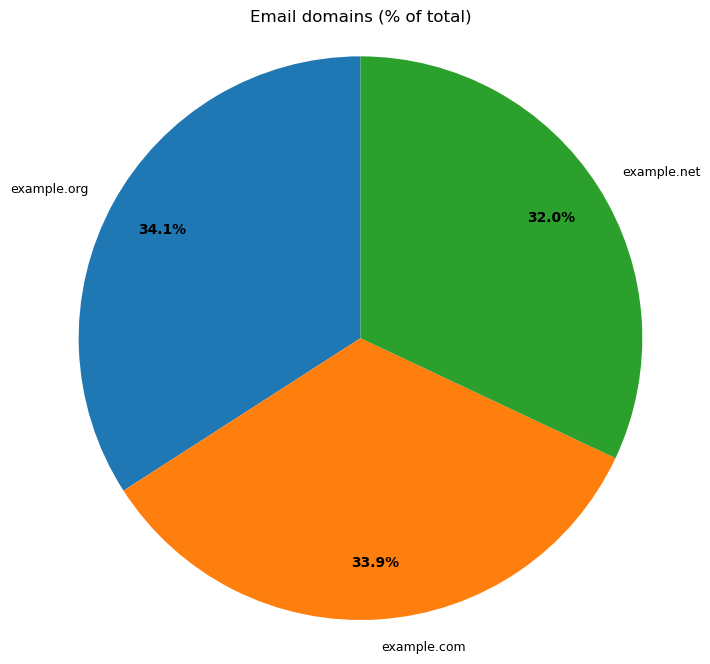

In [ ]:
# Less common email domains grouped into 'Other' if there are many/any.
counts = df['domain'].value_counts()
# Decide how many slices to show (top_n). Remaining will be grouped into 'Other'
top_n = 10
if len(counts) > top_n:
    top = counts.iloc[:top_n]
    other = counts.iloc[top_n:].sum()
    labels = list(top.index) + ['Other']
    sizes = list(top.values) + [other]
else:
    labels = list(counts.index)
    sizes = list(counts.values)

# Convert sizes to percentages of the total
total = sum(sizes)
percent_sizes = [s / total * 100 for s in sizes]

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Email domains (% of total)')
# Improve text size
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=9)

plt.show()

# END